<ipython-input-1-c4d022b31da2>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Year"] = pd.to_datetime(df["Date"], errors="coerce").dt.year
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


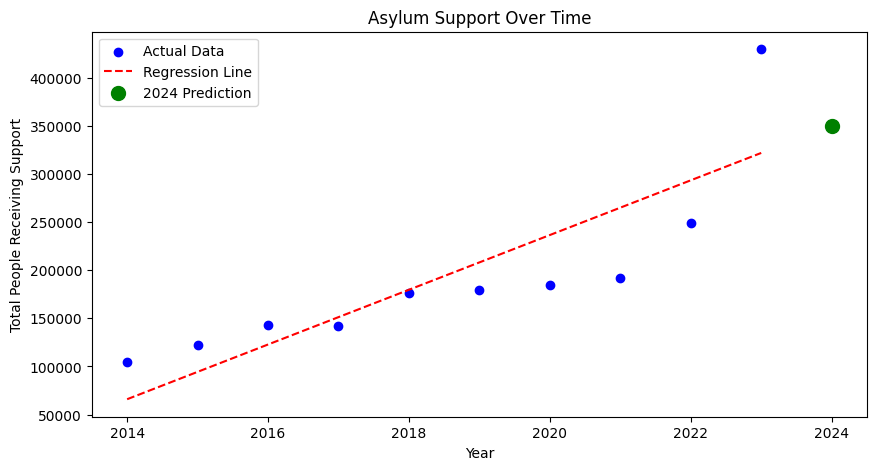

Mean Absolute Error (MAE): 36033.26293103397
Root Mean Squared Error (RMSE): 36929.19283876445
Predicted People Receiving Support for 2024: 350156.681034483


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Prepared-asylum-seekers-receipt-support-datasets-mar-2023.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and extract the year
df["Year"] = pd.to_datetime(df["Date"], errors="coerce").dt.year

#I converted the year column to numeric and then dropped missing values in the decisions column
df["People"] = pd.to_numeric(df["People"], errors="coerce")
df = df.dropna(subset=["Year", "People"])

#This aggregates the total number of people receiving support by year.
df_yearly = df.groupby("Year")["People"].sum().reset_index()

#I set the variables for x and y for regression
X = df_yearly[["Year"]]
y = df_yearly["People"]

#I split this into training and testing sets (80/20) and set this ramdom state to 42 to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#This trains the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#This makes predictions on the test data
y_pred = model.predict(X_test)

#This calculates the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#This code makes the prediction for the next year (2026)
next_year = np.array([[2024]])
next_year_prediction = model.predict(next_year)[0]

#This plots the results into a graph
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linestyle='dashed', label="Regression Line")
plt.scatter(2024, next_year_prediction, color='green', marker='o', s=100, label="2024 Prediction")
plt.xlabel("Year")
plt.ylabel("Total People Receiving Support")
plt.title("Asylum Support Over Time")
plt.legend()
plt.show()

#This prints the evaluation metrics and prediction
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Predicted People Receiving Support for 2024: {next_year_prediction}")
